In [50]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label, regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
import cv2

# Load the hand image
img = cv2.imread("Hand.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Image shape: (194, 260)


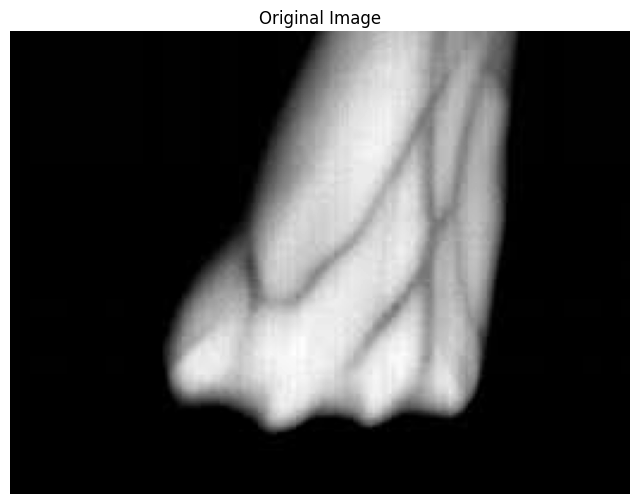

In [51]:
print("Image shape:", img_gray.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

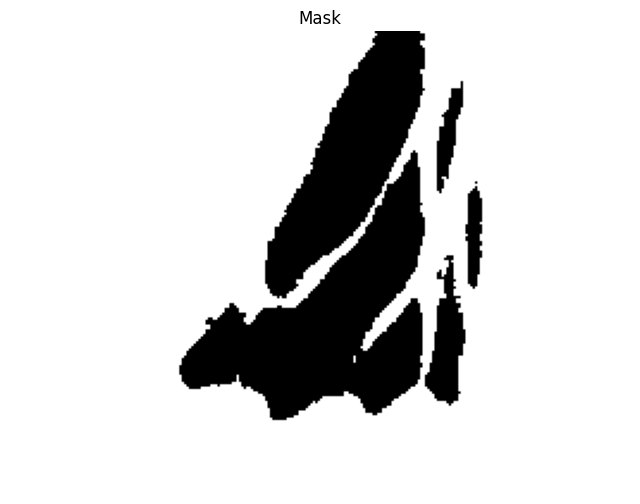

In [79]:
mask = img_gray < 153 # Modify the threshold as needed based on your image

plt.figure(figsize=(8, 8))
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

In [96]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [97]:
image = cv2.imread('Hand.jpeg')

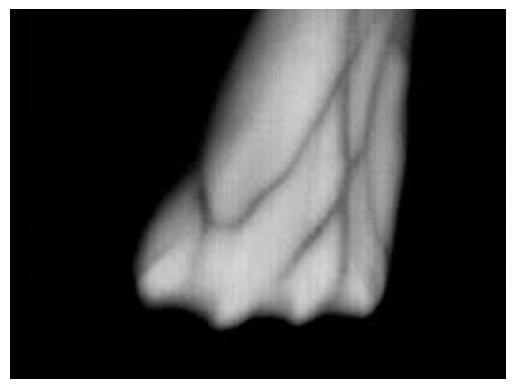

In [98]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image_rgb)

Text(0.5, 1.0, 'Image Histogram')

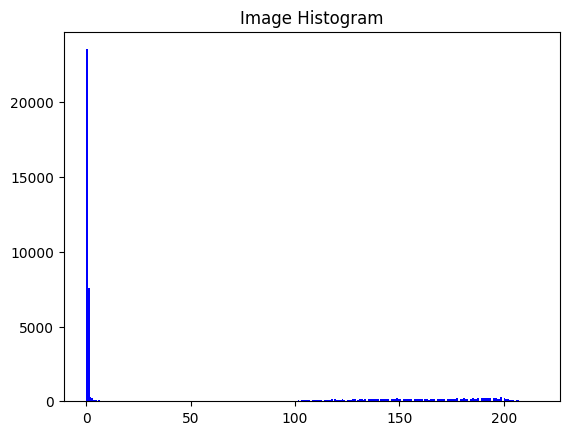

In [99]:
flat_image = image_rgb.reshape((-1, 3))
plt.hist(flat_image[:, 0], bins=256, color='red')
plt.hist(flat_image[:, 1], bins=256, color='green')
plt.hist(flat_image[:, 2], bins=256, color='blue')
plt.title('Image Histogram')


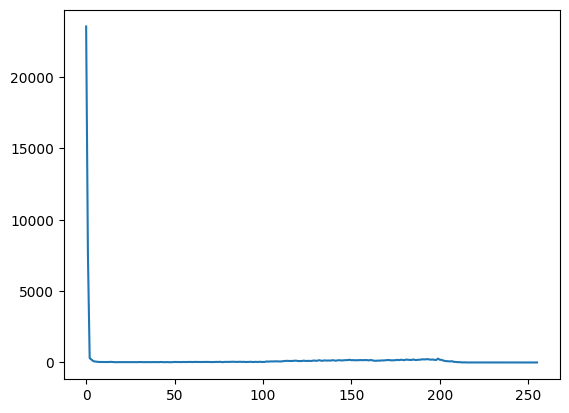

In [100]:
histogram = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
plt.plot(histogram)


In [101]:
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)


In [104]:
threshold_value = 150
_, binary_image = cv2.threshold(image_rgb, threshold_value, 255, cv2.THRESH_BINARY)

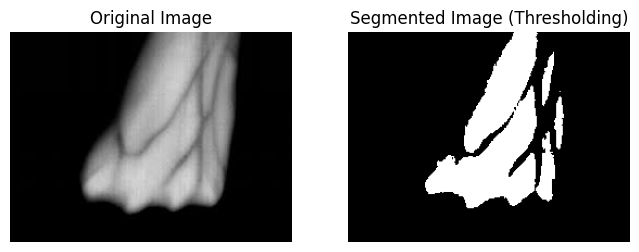

In [105]:
plt.figure(figsize=(8, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the segmented image
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image (Thresholding)')
plt.axis('off')

plt.show()

In [106]:
block_size = 21
c_value = 2

adaptive_thresholded_image_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c_value)
adaptive_thresholded_image_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c_value)

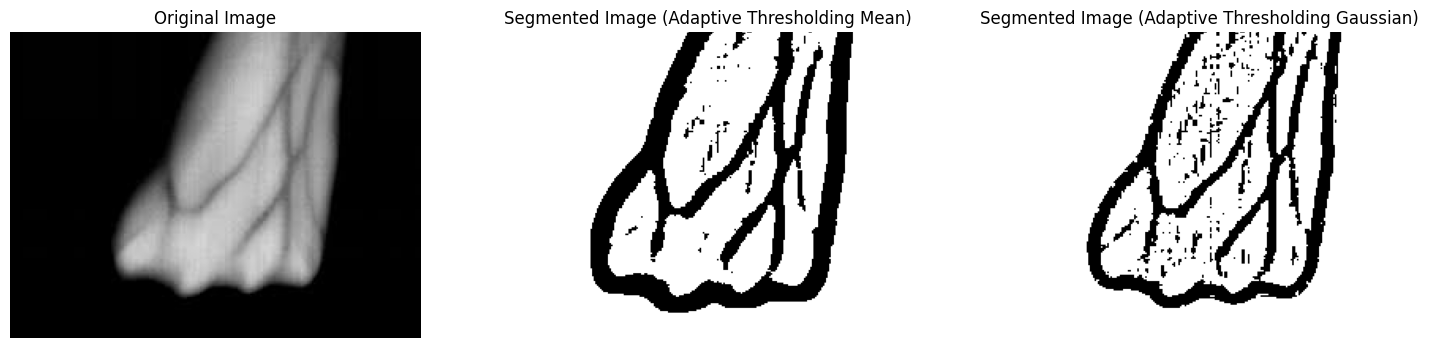

In [107]:
plt.figure(figsize=(18, 20))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the segmented image using adaptive thresholding
plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresholded_image_mean, cmap='gray')
plt.title('Segmented Image (Adaptive Thresholding Mean)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresholded_image_gaussian, cmap='gray')
plt.title('Segmented Image (Adaptive Thresholding Gaussian)')
plt.axis('off')

plt.show()


In [108]:
# Apply thresholding
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations to remove noise and smooth the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=4)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.19 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for the watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm (Add one to all labels so that sure background is not 0, but 1)
markers = cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [255, 0, 0]  # Mark watershed boundaries with red color

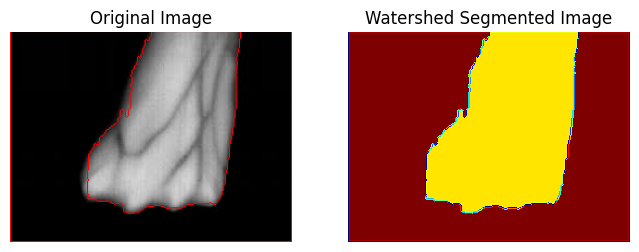

In [109]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmented Image')
plt.axis('off')

plt.show()

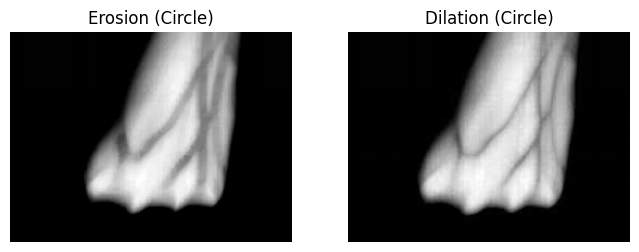

In [120]:
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
erosion_circle = cv2.erode(gray_image, circle_kernel, iterations=4)
dilation_circle = cv2.dilate(gray_image, circle_kernel, iterations=1)
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(erosion_circle, cmap='gray')
plt.title('Erosion (Circle)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilation_circle, cmap='gray')
plt.title('Dilation (Circle)')
plt.axis('off')

plt.show()

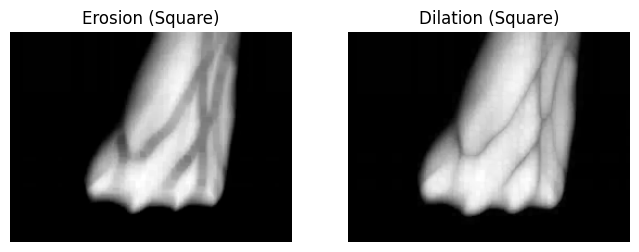

In [130]:
square_kernel = np.ones((2, 2), np.uint8)
erosion_square = cv2.erode(gray_image, square_kernel, iterations=4)
dilation_square = cv2.dilate(gray_image, square_kernel, iterations=2)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(erosion_square, cmap='gray')
plt.title('Erosion (Square)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilation_square, cmap='gray')
plt.title('Dilation (Square)')
plt.axis('off')

plt.show()

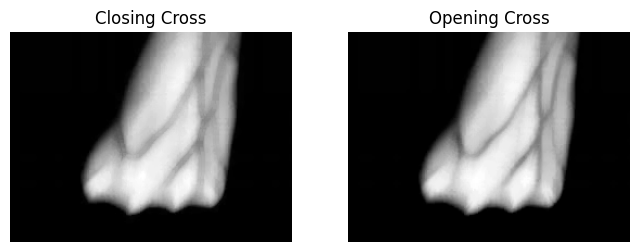

In [133]:
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (6, 6))
closing_cross = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, cross_kernel)
opening_cross = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, cross_kernel)
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(closing_cross, cmap='gray')
plt.title('Closing Cross')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening_cross, cmap='gray')
plt.title('Opening Cross')
plt.axis('off')

plt.show()